In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Import dataset
df = pd.read_pickle('DoE_results_3d_1k.pkl')
points_df = df['points']

#Eliminate all NaN output values 
points_df_1 = points_df[(points_df['sigma_crit'] > 0) & (points_df['energy'] >= 0)]
sigma_crit_1 = points_df_1['sigma_crit']
energy_1 = points_df_1['energy']

#Find the quartiles to eliminate outliers
q1_s = np.percentile(sigma_crit_1,25.0)
q3_s = np.percentile(sigma_crit_1, 75.0)
q1_e = np.percentile(energy_1,25.0)
q3_e = np.percentile(energy_1, 75.0)

#Define the highest point which is not considered an outlier
high_s = q3_s + 1.5*(q3_s-q1_s)
high_e = q3_e + 1.5*(q3_e-q1_e)
#Eliminate outliers
points_df_2 = points_df[(points_df['sigma_crit'] < high_s) & (points_df['energy'] < high_e)]

#Convert the columns to arrays
RD = points_df_2[['ratio_d']].to_numpy()
RP = points_df_2[['ratio_pitch']].to_numpy()
RT = points_df_2[['ratio_top_diameter']].to_numpy()
S  = points_df_2[['sigma_crit']].to_numpy()
E  = points_df_2[['energy']].to_numpy()


In [2]:
input1 = RD
input2 = RP
input3 = RT
output = S

X_data = np.array([input1,input2,input3]).reshape(3,-1).T
Y_data = np.array([output]).reshape(-1,1)
xx1, xx2 ,xx3 = np.meshgrid(input1,input2,input3,sparse=True)
yy1 = output

train_size= 0.75
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X_data, Y_data, train_size=train_size)
yy1 = np.reshape(yy1, np.shape(xx1))

In [3]:
degree = 6
model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
model.fit(X_Train, Y_Train)
y_data_pred = model.predict(X_data)
yy1_data_pred = np.reshape(y_data_pred,np.shape(xx1))
nsamples, nx, ny = yy1.shape
d2_yy1 = yy1.reshape((nsamples,nx*ny))

d2_yy1_data_pred = yy1_data_pred.reshape((nsamples,nx*ny))
mse_value = mean_squared_error(d2_yy1.T, d2_yy1_data_pred.T)
r2_value  = r2_score(d2_yy1.T, d2_yy1_data_pred.T)
print('MSE for degree',degree,'=', mse_value)
print('R2 score for degree',degree,'=', r2_value)

MSE for degree 6 = 0.002534480429652049
R2 score for degree 6 = 0.9999913275511666


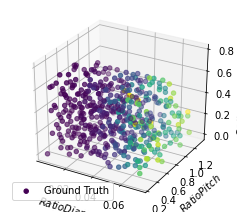

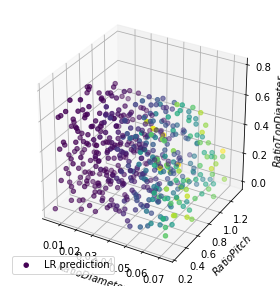

In [6]:
### from mpl_toolkits.mplot3d import Axes3D

set_cm = cm.cool

fig1 = plt.figure(figsize=plt.figaspect(2.0))
#
# Subplot 1 (top) of Figure 1: ground truth
ax1 = fig1.add_subplot(2, 1, 1, projection='3d')
#
# Don't forget that for a Surface plot we need the data
# coming out of meshgrid not in the format of X_data (!)
#
surf = ax1.scatter(xx1, xx2,xx3,c= yy1,label ="Ground Truth")

# Create axis labels and title:
ax1.set_xlabel('$Ratio Diameter$')
ax1.set_ylabel('$Ratio Pitch$')
ax1.set_zlabel('$Ratio Top Diameter$')
# Subplot 2 (bottom) of Figure 1
#ax2 = fig1.add_subplot(2, 1, 2, projection='3d')
#
ax1.legend(loc='lower left')
fig2 = plt.figure(figsize=plt.figaspect(2.0))
#
# Subplot 1 (top) of Figure 1: ground truth
ax2 = fig2.add_subplot(2, 1, 1, projection='3d')
surf = ax2.scatter(xx1, xx2,xx3,c= yy1_data_pred,label="LR prediction")
# Create axis labels and title:
ax2.set_xlabel('$Ratio Diameter$')
ax2.set_ylabel('$Ratio Pitch$')
ax2.set_zlabel('$Ratio Top Diameter$')
ax2.legend(loc='lower left')
plt.tight_layout()
